## Convolutional Layers
* convolutional layer are not connected to every single pixel in previous layer
  * connected to previous receptive field
* focuses on small low-level features in first layers
* as layers increase, the features assemble them into larger higher-level features

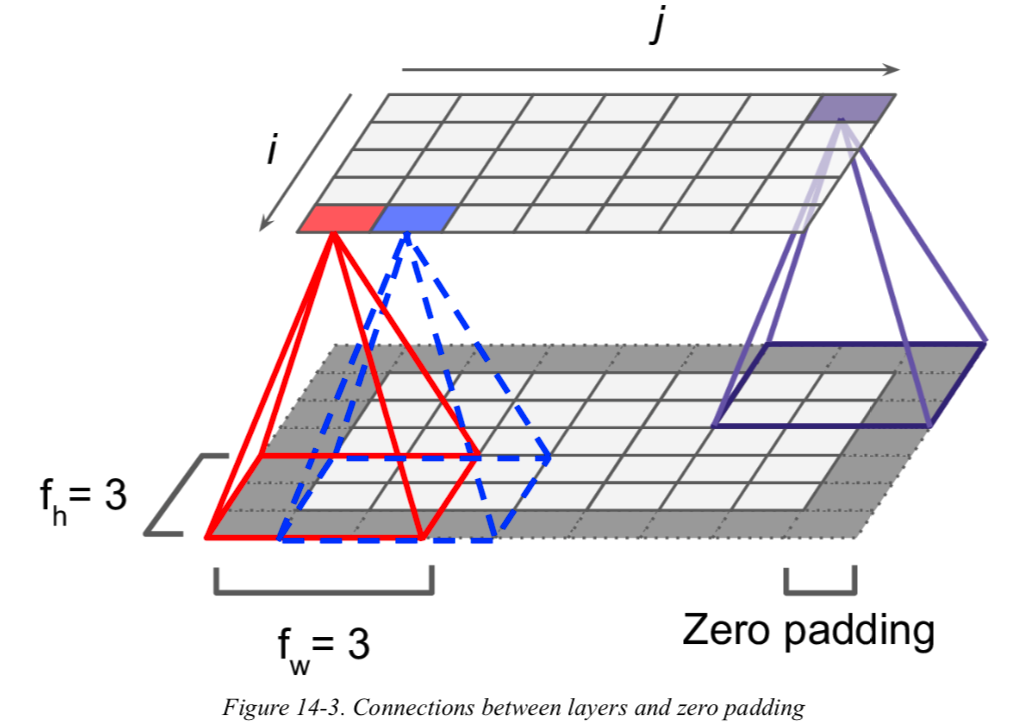

* use zero-padding when layers are desired to have the same dimensions
* else the next layer will be smaller
* reduces model's computational complexity
* strides: how much should the filter slide
* filters or kernels
  * enhances the feature that the filter is looking for in the input layer
  * layer full of neurons using the same filter outputs a **feature map** which highlights areas in an image tha activate filter most
  * stack multiple filters
    * outputs a feature map for each filter
  * all neurons in a feature map share the same parameters (weights and biases)
  * since they share the parameters, there are less parameters to learn 
  * simultaneously applies multiple trainable fitlers to its inputs, making it capable of detecting multiple features anywhere in its input


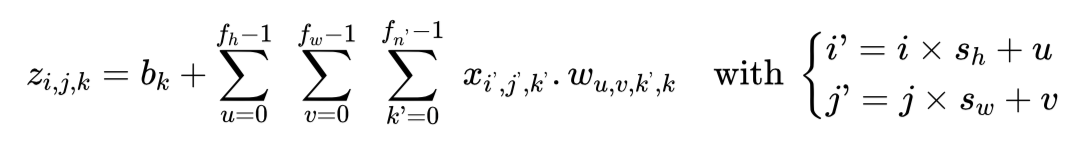

* $z_{i,j,k}$: output of neuron located in row i, column j in filter k of convolutional layer l
* $s_h$ and $s_w$: vertical and horizontal strides
* $f_h$ and $f_w$: height and width of receptive field
* $f_{n'}$: number of feature maps (filters) in previous layer
* $x_{i',j',k'}$: output neuron located in layer l-1, row i', column j', feature map k'
* $b_k$: bias term for feature map
* $w_{u,v,k',k}$: connection weight between any neuron in feature map k of layer

### Tensorflow Implementation
* images are 3-D tensors with shape: [height, width, channels]
* if minibatches are applied, shape: [mini-batch size, height, width, channels]
* weights have shape: [$f_h$, $f_w$, $f_{n'}$, $f_n$]
  * $f_{n'}$: number of feature maps in the previous layer
  * $f_n$: number of filters in current layer
* bias: [$f_n$]

In [1]:
# Loading data

## Imports
import numpy as np
from sklearn.datasets import load_sample_image

## Loading couple images and scaling the pixel intensities for each channel
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

## Putting it in a batch
images = np.array([china, flower])

## Getting dimensions
batch_size, height, width, channels = images.shape

In [2]:
images.shape

(2, 427, 640, 3)

In [3]:
# Creating two filter

filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3:,:,:,1] = 1

In [4]:
# Using tf to see what the filters did

import tensorflow as tf

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

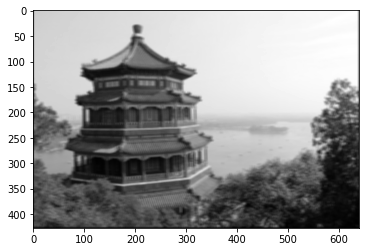

In [5]:
# Viewing the image

import matplotlib.pyplot as plt

plt.imshow(outputs[0,:,:,1], cmap="gray")
plt.show()

In [6]:
# Implementing conv2d in Keras

from tensorflow import keras

conv = keras.layers.Conv2D(
  filters=32,
  kernel_size=3,
  strides=1,
  padding="SAME",
  activation="relu"
)

Memory Requirements
* requires huge RAM

## Pooling Layers
* aggregate inputs creating a subsample
  * subsample: shrink the input image
* need to define size, stride, and padding type
* depth stays the same
* reduce computations, memory usage, number of parameters and some level of invariance to small translations
    * translational invariance: object doesn't vary when it is translated
* no weights
* drawbacks
  * output will be smaller
  * don't use it if invariance is not needed
* max pooling, average pooling, global average pooling

In [7]:
# Implementing max pooling

max_pool = keras.layers.MaxPool2D(pool_size=2)

## CNN Architectures



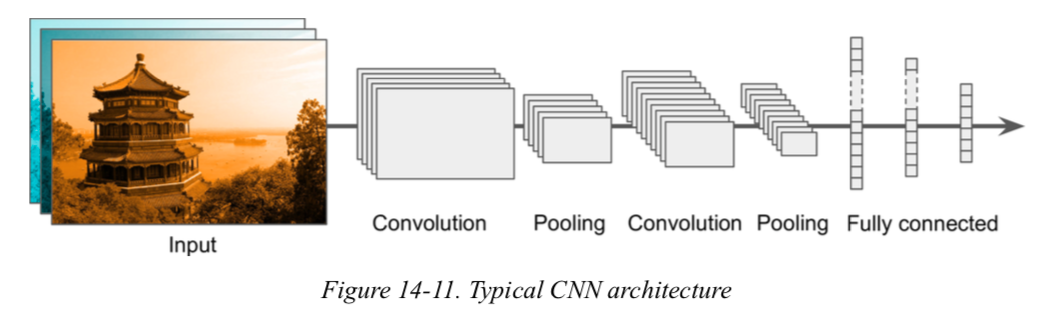

### Implementing CNN on Fashion MNIST dataset

In [8]:
# Getting the data

## Loading data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

## Splitting train full into train and validation
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
# Normalizing the data

## Getting the mean
X_mean = X_train.mean(axis=0, keepdims=True)

## Getting the standard deviation
X_std = X_train.std(axis=0, keepdims=True) + 1e-7

## Normalizing the train and validation data (subtract mean and divide by std)
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [10]:
# Viewing the shape

X_train.shape

(55000, 28, 28)

In [11]:
# Increasing the dimensions of data

## Using np.newaxis to add another dimension
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

## Viewing the shape after np.newaxis
X_train.shape

In [ ]:
# Creating the CNN model

model - keras.models.Sequential([
    
    ## First Layer
    keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding="SAME", input_shape=[28,28,1]),
    keras.layers.MaxPool2D(pool_size=2),
    
    ## Second Layer
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),

    ## Third Layer
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPool2D(pool_size=2),

    ## Fourth Layer
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),

    ## Fifth Layer
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPool2D(pool_size=2),

    ## Sixth Layer
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0..5),

    ## Seventh Layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),

    ## Output Layer
    keras.layers.Dense(10, activation='softmax')
])

* number of filters grow as CNN grows
  * number of low features (circles, straight lines, etc) are low but can be combined many ways to higher-level features
  * double the filter with max pooling with size of 2
* flatten the layer and add couple dense layers

### LeNet-5
* created by Yann LeCun in 1998
* MNISt is 28x28 but he zero-padded to make it 32x32
* average pooling
  * multiplies a the average value by a learnable coefficient and learnable vias term


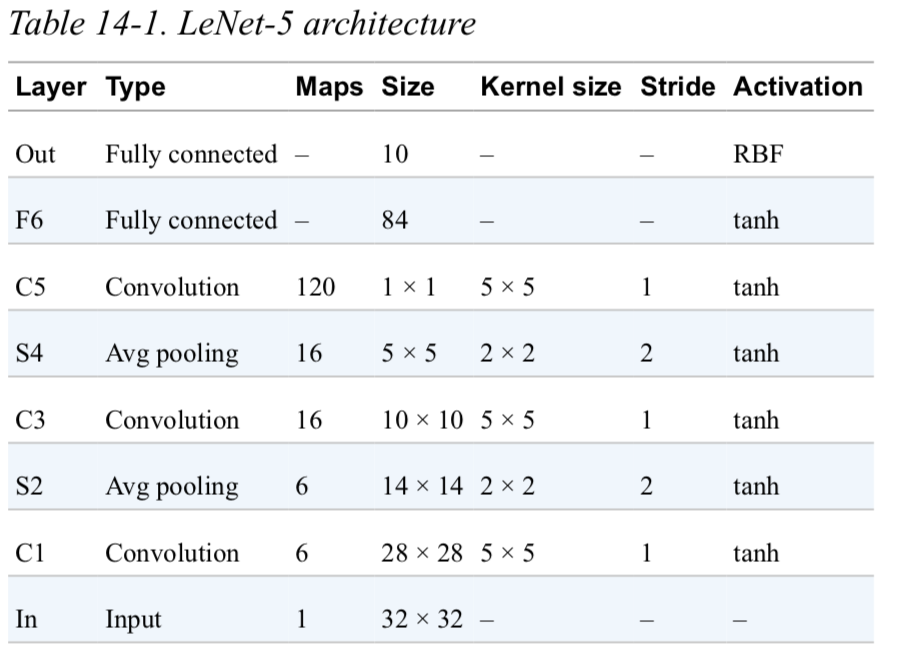

### AlexNet
* used two regularization techniques
  * used dropout on the FC layers
  * data augmentation
    * randomly shifting, flipping, lighting tweaks on images
    * increases size of trainign set by generating realistic variants of each training instance
    * reduces overfitting
* LRN (local response normalization)
  * intuition: most strongly activated neurons restrict other neurons located at the same position in neighboring feature maps
    * encourages different maps to specialize, allowing exploration on a wider range of features -> reduces overfitting

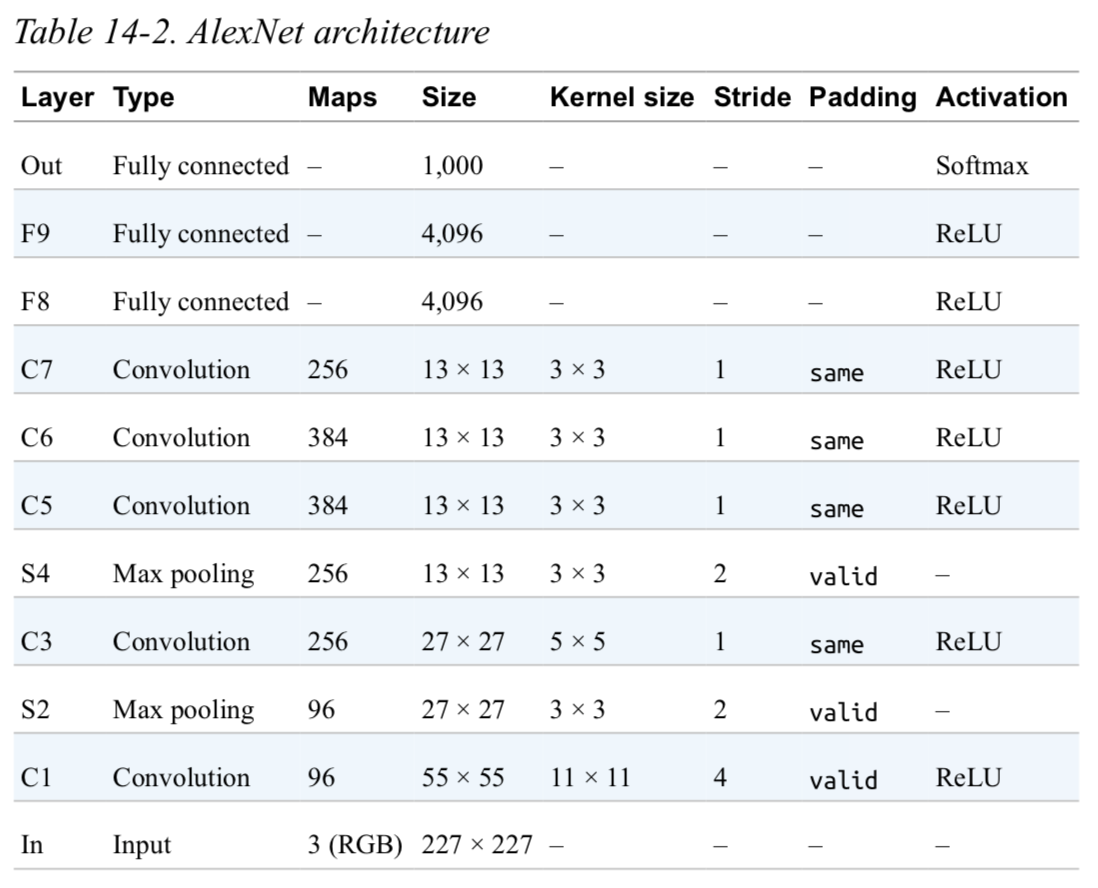

### GoogLeNet
* much deeper than previous CNNs
* inception modules
  * 10x fewer parameters than AlexNet
* "3x3+1(S)": 3x3 kernel, stride 1, "same" padding
* all the dimensions stay the same so it can be concatenated later
* 1x1 Convolutions
  * cannot capture spatial patterns, but captures depth patterns
  * can be used as a bottleneck layer 
    * output fewer feature maps than their inputs
    * cuts dimensionality, computational cost, number of parametsrs

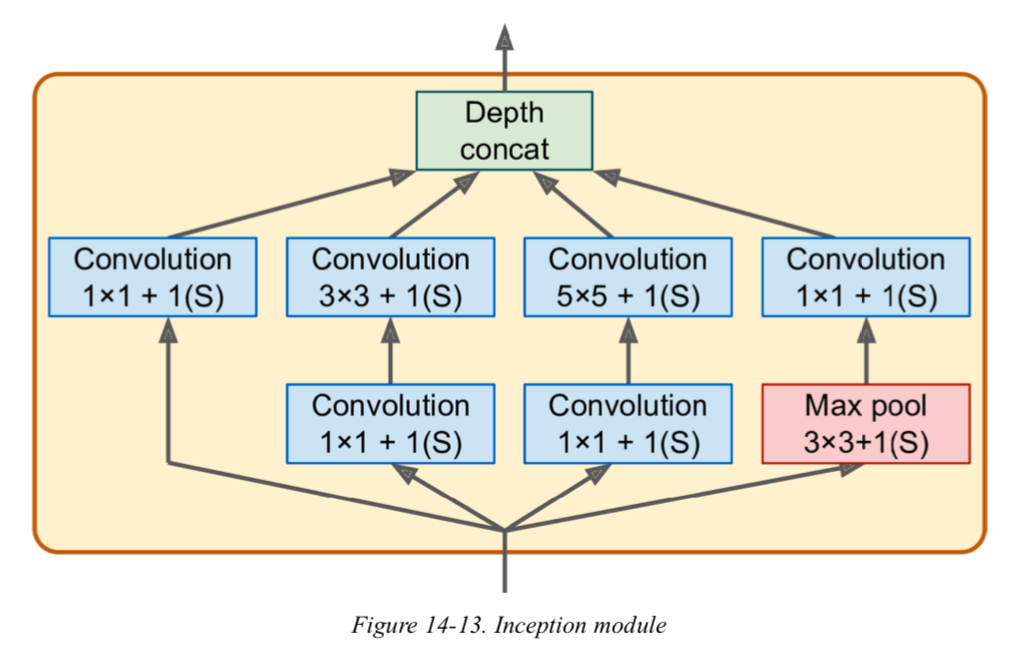

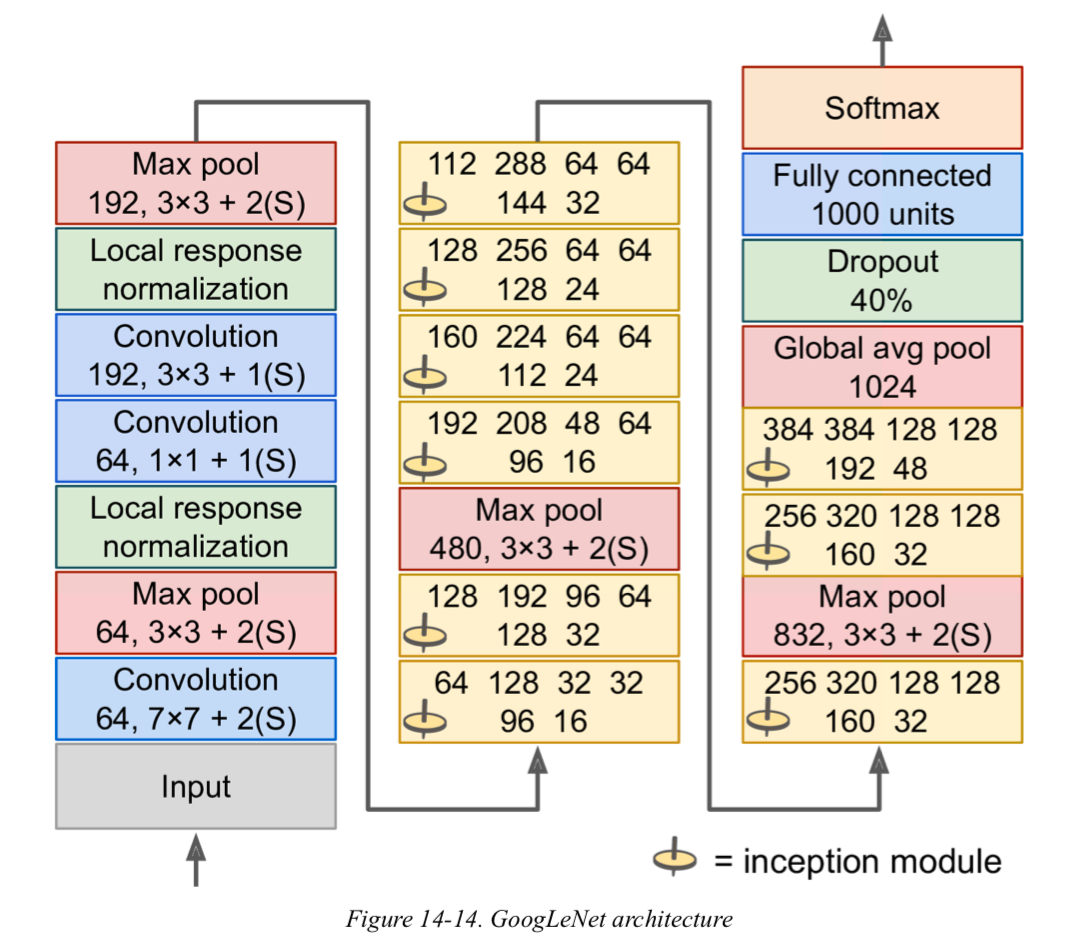

### VGGNet
* Visual Geometry Group
* 16 or 19 convolutional layers
  * consisting of 2 or 3 conv layers and a pooling layer
* 2 hidden dense layers
* 1 output layer

### ResNet
* trend: models getting deeper and deeper with fewer and fewer parametsr
* 152 layers
* skip connections
  * adding layers to an output of a later layer
* residual learning
* each residual unit is comprised
  * two convolutional layers
  * no pooling layers
  * BatchNormalization
  * ReLU activation
  * 3x3 kernels
  * preserving spatial dimensions
    * stride: 1, "same" padding

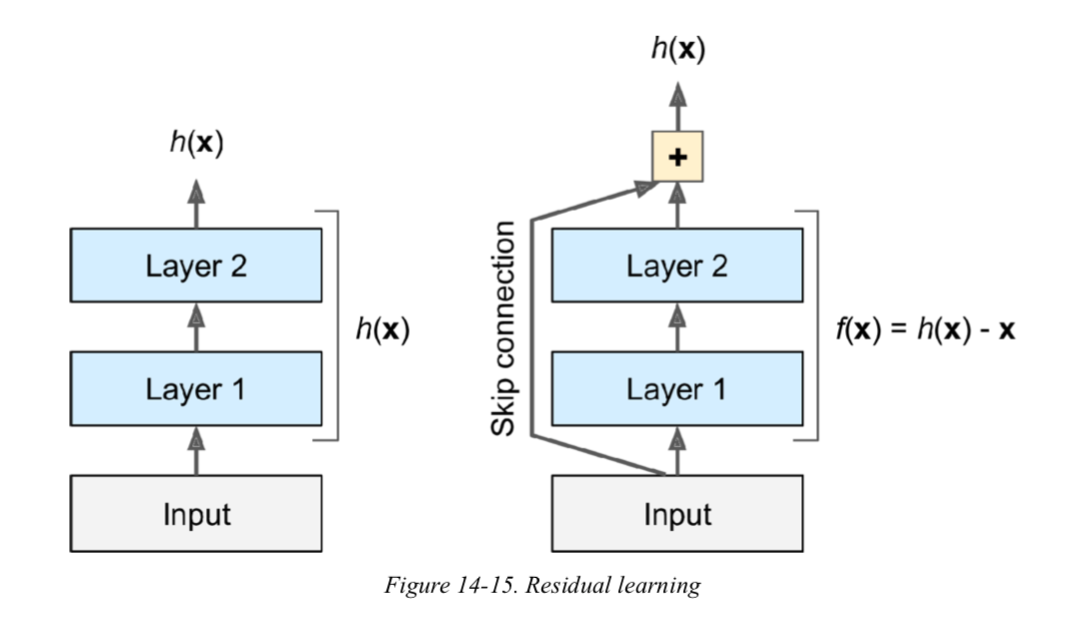

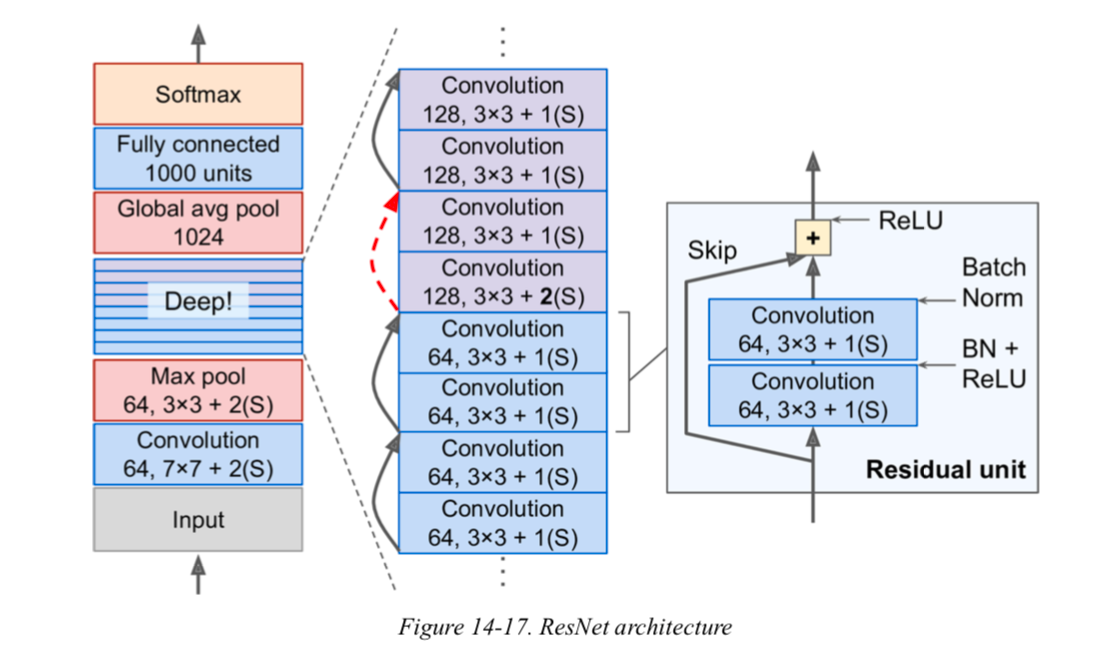

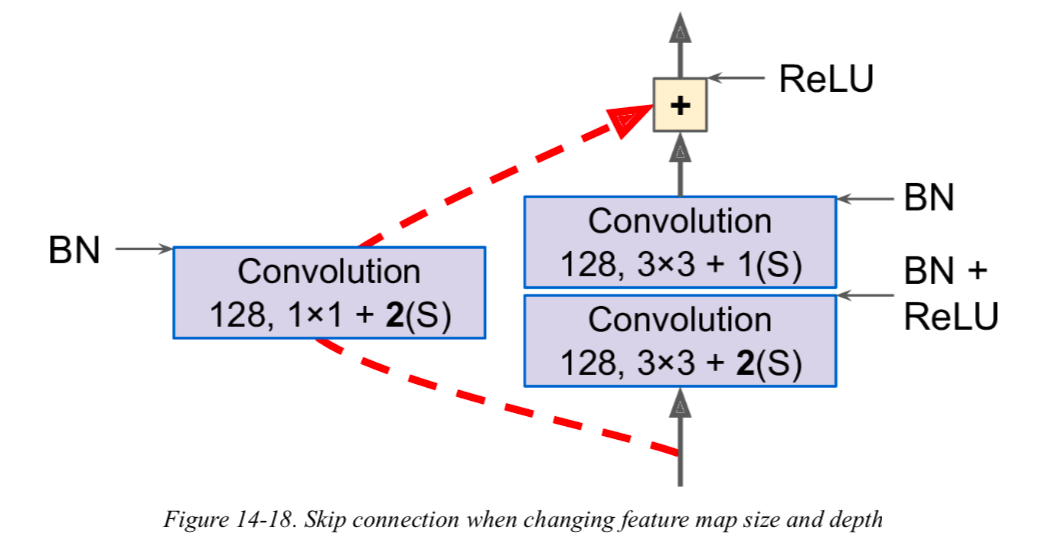